In [81]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, balanced_accuracy_score, confusion_matrix
import matplotlib.pyplot as plt

import matplotlib.colors as colors
import matplotlib.cm as cmx

import warnings
warnings.filterwarnings("ignore")

In [82]:
df = pd.read_csv("/Users/margauxfre/ML_Project/ObesityDataSet_raw_and_data_sinthetic.csv")

In [83]:
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [84]:
df.tail()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III
2110,Female,23.664709,1.738836,133.472641,yes,yes,3.0,3.0,Sometimes,no,2.863513,no,1.026452,0.714137,Sometimes,Public_Transportation,Obesity_Type_III


In [85]:
# print all the name of the columns
for col in df.columns : print(col)

Gender
Age
Height
Weight
family_history_with_overweight
FAVC
FCVC
NCP
CAEC
SMOKE
CH2O
SCC
FAF
TUE
CALC
MTRANS
NObeyesdad


In [86]:
# print (number of rows, number of columns)
df.shape

(2111, 17)

In [87]:
# print the type of each column variable
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [88]:
df.isna().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [89]:
df.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


We can see our standard deviation is high : 26.2

We can add that the spread between the max and the min is large : 173 - 39 = 134

In fact, it's quite hard to define if the standard deviation is large or not. For more details, we can compute the coefficient of variation which give us how large is the standard deviation compared to mean :
    
  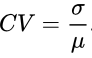

In [90]:
cv_weight = (df["Weight"].std() / df["Weight"].mean())*100

In [91]:
print(cv_weight)

30.24871707053116


The standard deviation compared to the mean of weight is large by 30.2%

Same for height :

In [92]:
cv_height = (df["Height"].std() / df["Height"].mean())*100

In [93]:
print(cv_height)

5.483108750445909


The standard deviation compared to the mean of height is large by only 5.5% which is not significantly large.

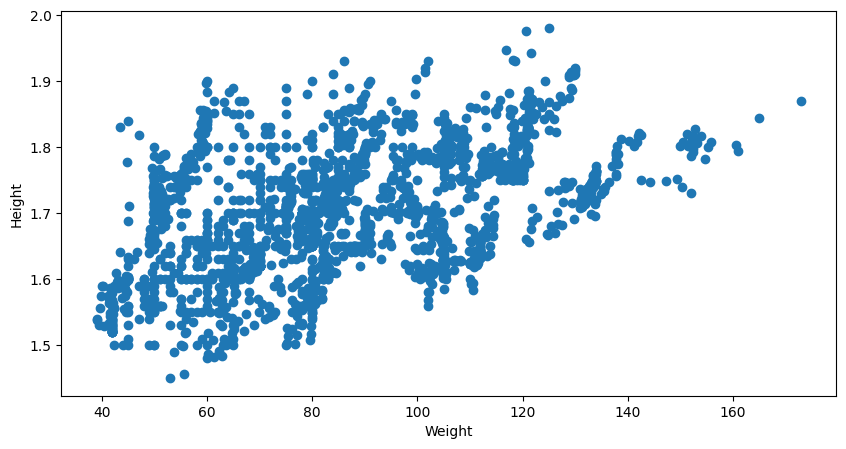

In [94]:
fig, ax = plt.subplots()

ax.scatter(df["Weight"], df["Height"])
ax.set_xlabel("Weight")
ax.set_ylabel("Height")
plt.rcParams['figure.figsize'] = [10, 5] 

plt.show()

In [95]:
df["ln_weight"]=np.log(df["Weight"])
df["ln_height"]=np.log(df["Height"])

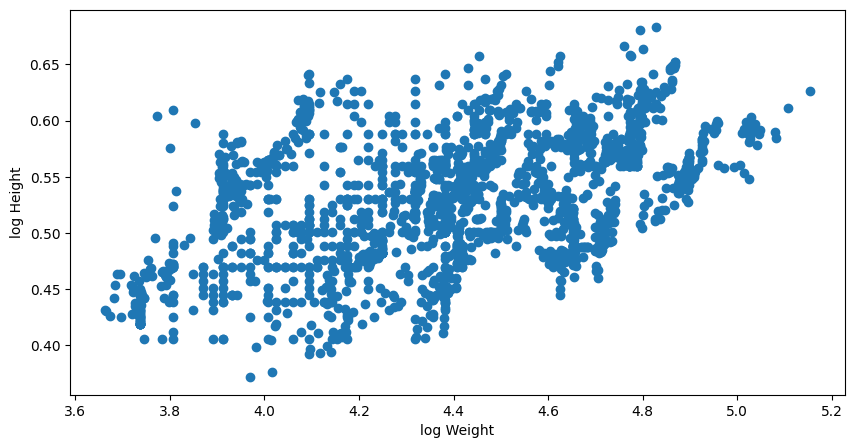

In [96]:
fig, ax = plt.subplots()

ax.scatter(df["ln_weight"], df["ln_height"])
ax.set_xlabel("log Weight")
ax.set_ylabel("log Height")
plt.rcParams['figure.figsize'] = [10, 5] 

plt.show()

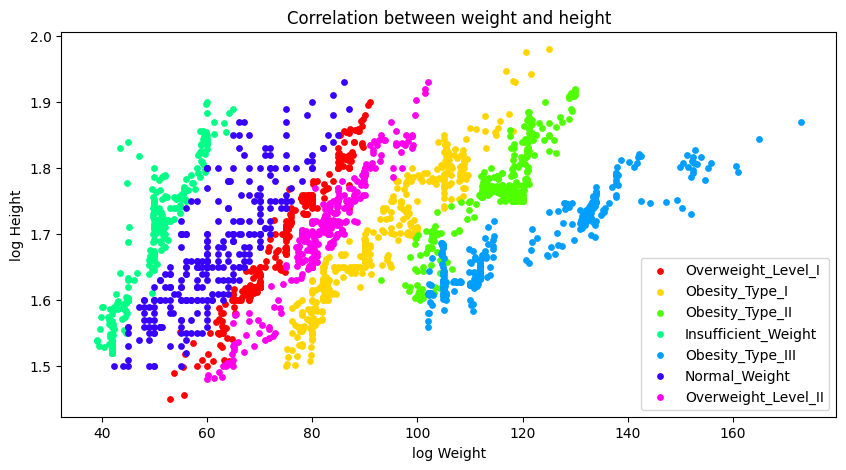

In [97]:
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cmx

# Scatter of Petal
x = df['Weight']
y = df['Height']

# Get the obesity type
uniq = list(set(df['NObeyesdad']))

# Set the color map to match the type
z = range(1, len(uniq))
cmap = plt.get_cmap('hsv')
cNorm = colors.Normalize(vmin=0, vmax=len(uniq))
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=cmap)

# Plot each type
for i in range(len(uniq)):
    indx = df['NObeyesdad'] == uniq[i]
    plt.scatter(x[indx], y[indx], s=15, color=scalarMap.to_rgba(i), label=uniq[i])

plt.xlabel('log Weight')
plt.ylabel('log Height')
plt.title('Correlation between weight and height')
plt.legend(loc='lower right')
plt.show()


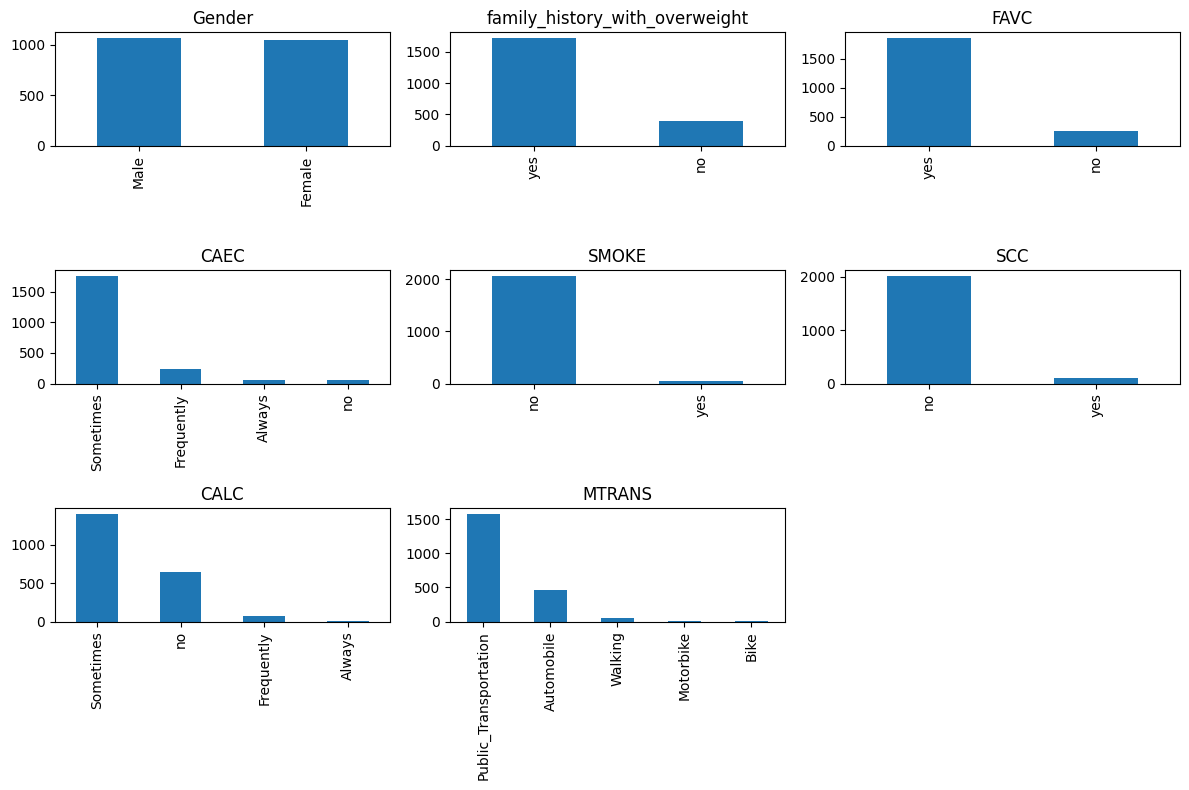

In [98]:
# Mise à jour de la liste des colonnes catégorielles
categorical_cols = ["Gender", "family_history_with_overweight", "FAVC", "CAEC", "SMOKE", "SCC", "CALC", "MTRANS"]

# Visualisations pour les variables catégorielles
plt.figure(figsize=(12, 8))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(3, 3, i)
    df[col].value_counts().plot(kind='bar', title=col)
plt.tight_layout()
plt.show()

In [99]:
df["NObeyesdad"].value_counts()

Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_I     290
Overweight_Level_II    290
Normal_Weight          287
Insufficient_Weight    272
Name: NObeyesdad, dtype: int64

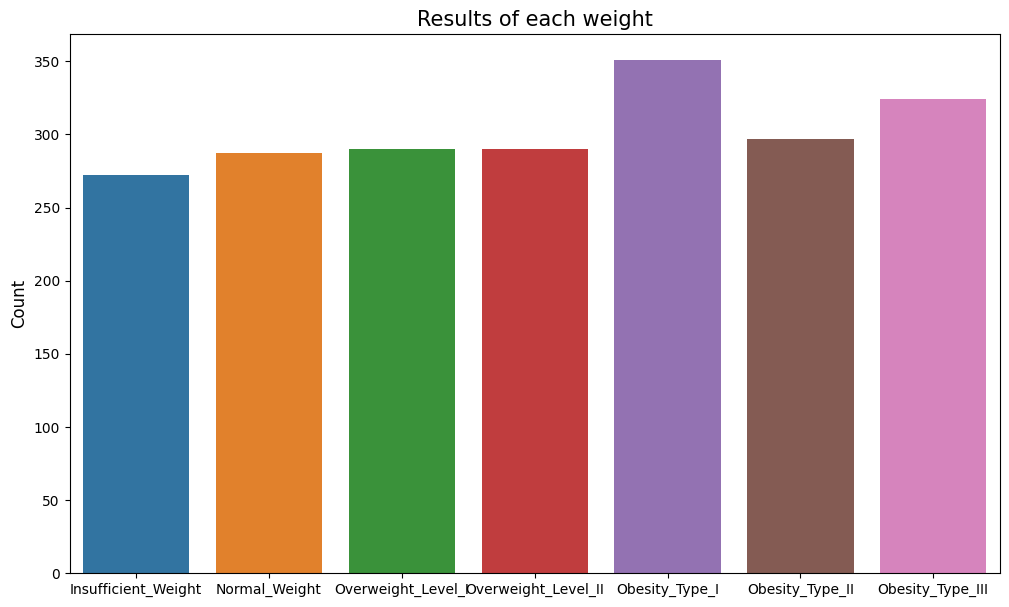

In [100]:
name = df['NObeyesdad'].value_counts().index
num = df['NObeyesdad'].value_counts().values

fig = px.pie(data_frame=df,names=name,values=num
             ,title='Pies chard show the over all result',width=800,height=600)
fig.update_traces(textposition='inside',textinfo='label+percent')
fig.show()

plt.figure(figsize=(12,7))
sns.countplot(x='NObeyesdad',data=df,order=['Insufficient_Weight','Normal_Weight','Overweight_Level_I',
'Overweight_Level_II','Obesity_Type_I','Obesity_Type_II','Obesity_Type_III'])
plt.xlabel(None)
plt.ylabel('Count',fontsize=12)
plt.title('Results of each weight',fontsize=15)
plt.show()

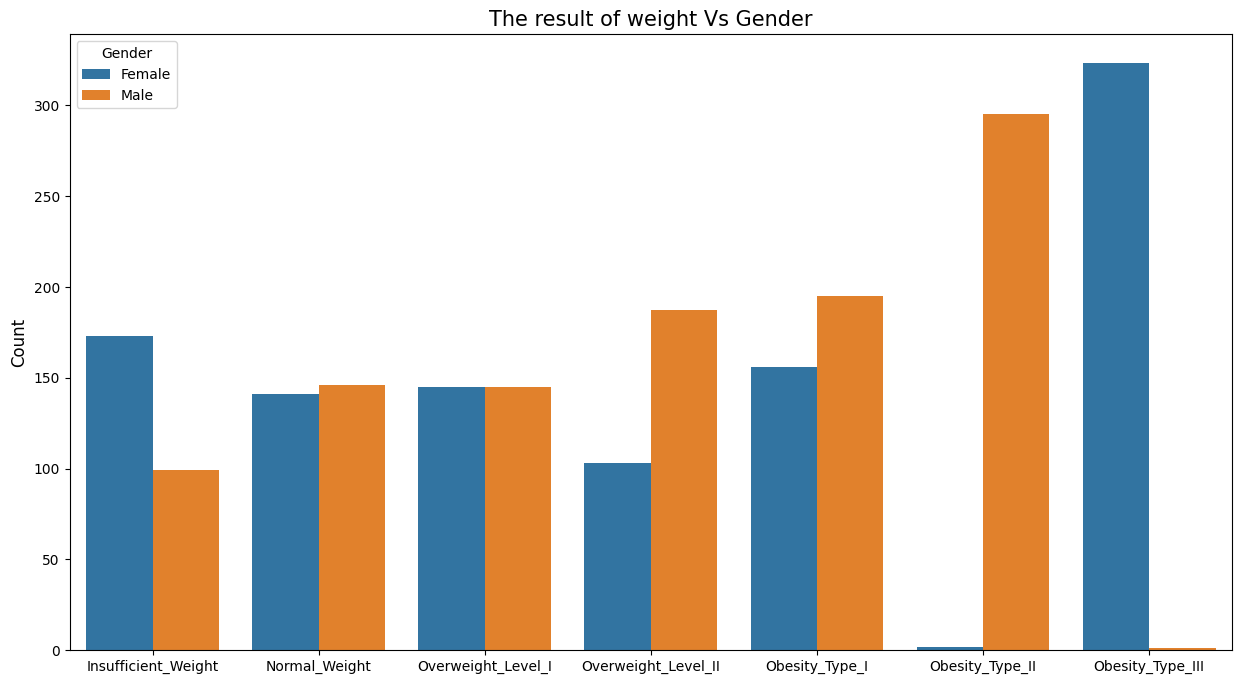

In [101]:
plt.figure(figsize=(15,8))
sns.countplot(x='NObeyesdad',data=df,hue='Gender',order=['Insufficient_Weight','Normal_Weight','Overweight_Level_I',
'Overweight_Level_II','Obesity_Type_I','Obesity_Type_II','Obesity_Type_III'])
plt.ylabel('Count',fontsize=12)
plt.xlabel(None)
plt.title('The result of weight Vs Gender',fontsize=15)
plt.show()

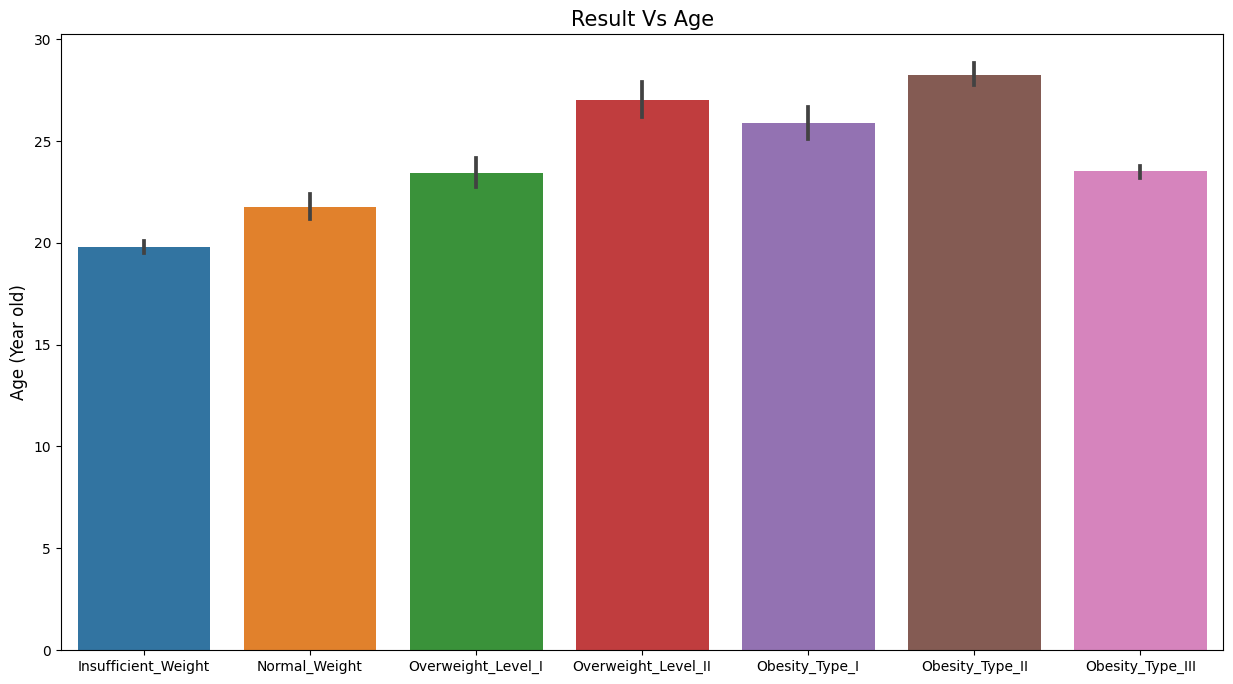

In [102]:
plt.figure(figsize=(15,8))
sns.barplot(x='NObeyesdad',y='Age',data=df,order=['Insufficient_Weight','Normal_Weight','Overweight_Level_I',
'Overweight_Level_II','Obesity_Type_I','Obesity_Type_II','Obesity_Type_III'])
plt.title('Result Vs Age',fontsize=15)
plt.ylabel('Age (Year old)',fontsize=12)
plt.xlabel(None)
plt.show()

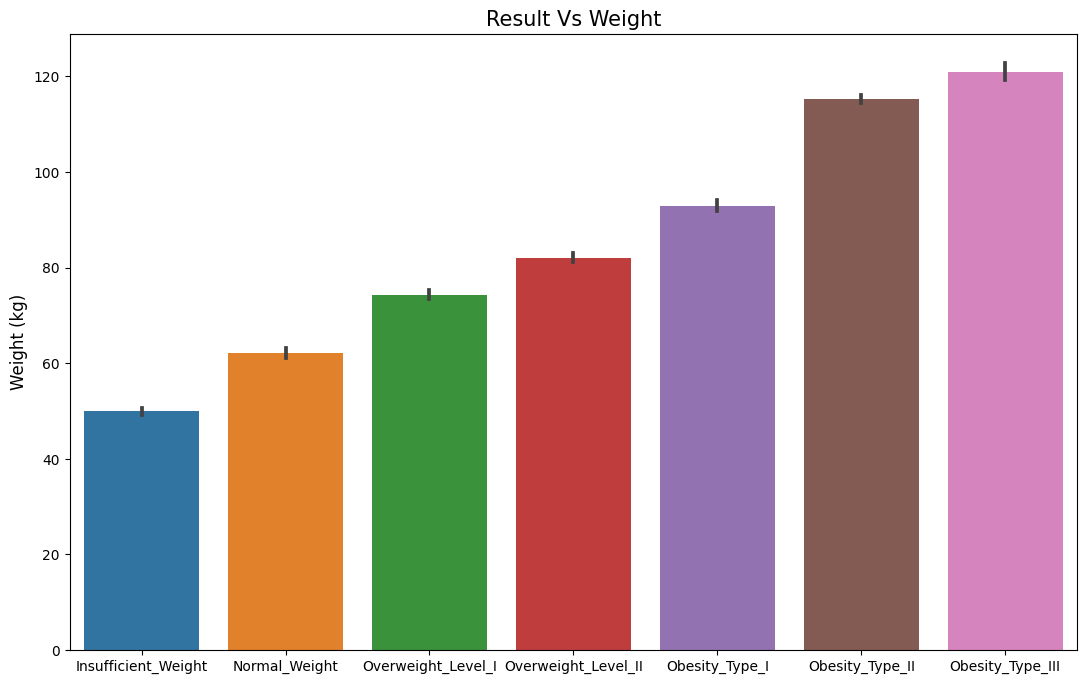

In [103]:
plt.figure(figsize=(13,8))
sns.barplot(x='NObeyesdad',y='Weight',data=df,
            order=['Insufficient_Weight','Normal_Weight','Overweight_Level_I',
'Overweight_Level_II','Obesity_Type_I','Obesity_Type_II','Obesity_Type_III'])
plt.xlabel(None)
plt.ylabel('Weight (kg)',fontsize=12)
plt.title('Result Vs Weight',fontsize=15)
plt.show()

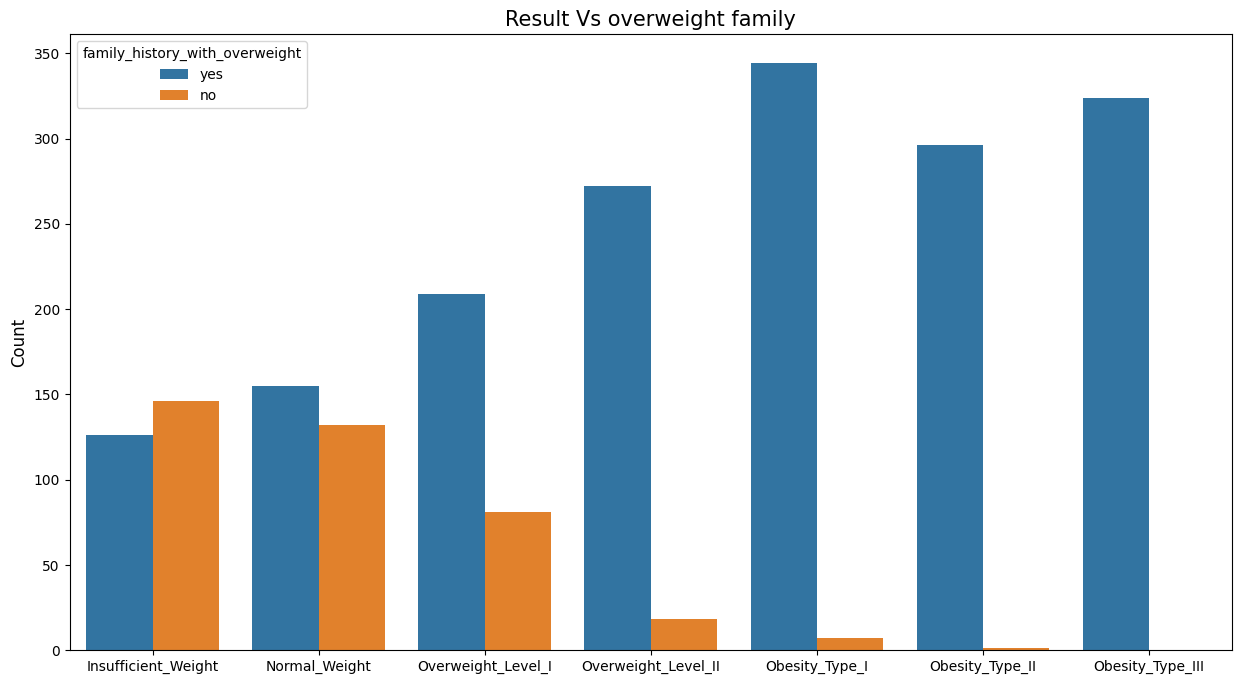

In [104]:
plt.figure(figsize=(15,8))
sns.countplot(x='NObeyesdad',data=df,hue='family_history_with_overweight',
            order=['Insufficient_Weight','Normal_Weight','Overweight_Level_I',
'Overweight_Level_II','Obesity_Type_I','Obesity_Type_II','Obesity_Type_III'])
plt.xlabel(None)
plt.ylabel('Count',fontsize=12)
plt.title('Result Vs overweight family',fontsize=15)
plt.show()

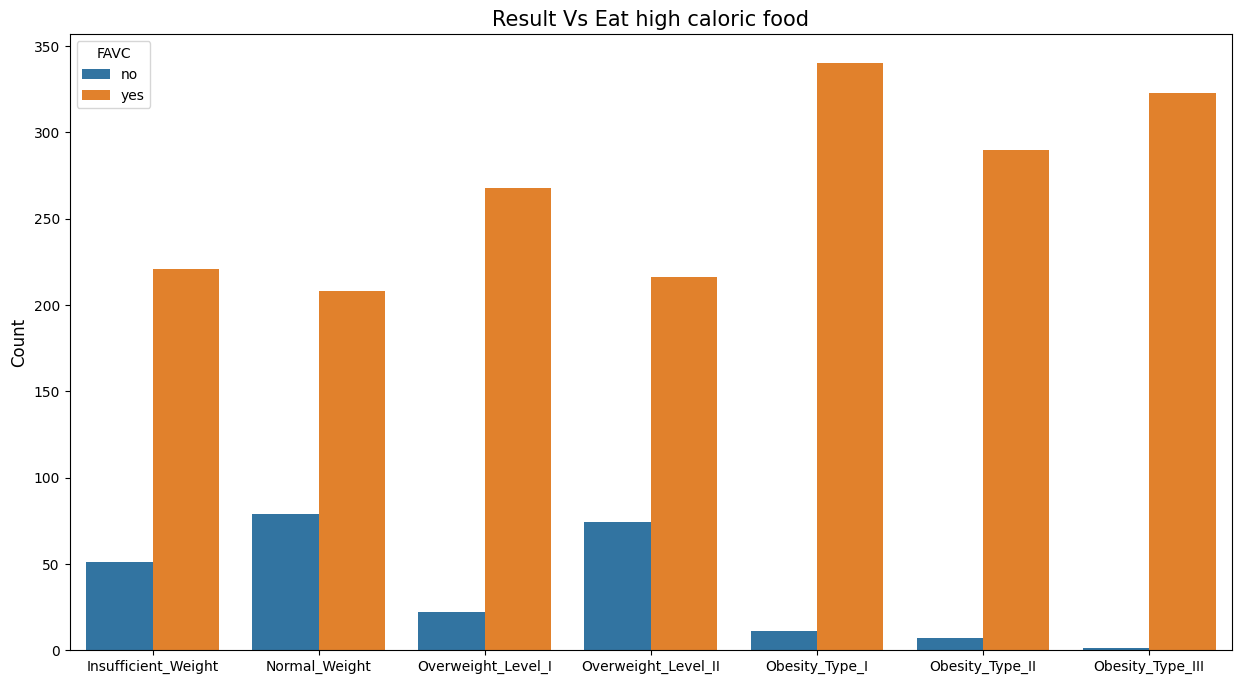

In [105]:
plt.figure(figsize=(15,8))
sns.countplot(x='NObeyesdad',data=df,hue='FAVC',
            order=['Insufficient_Weight','Normal_Weight','Overweight_Level_I',
'Overweight_Level_II','Obesity_Type_I','Obesity_Type_II','Obesity_Type_III'])
plt.xlabel(None)
plt.ylabel('Count',fontsize=12)
plt.title('Result Vs Eat high caloric food',fontsize=15)
plt.show()

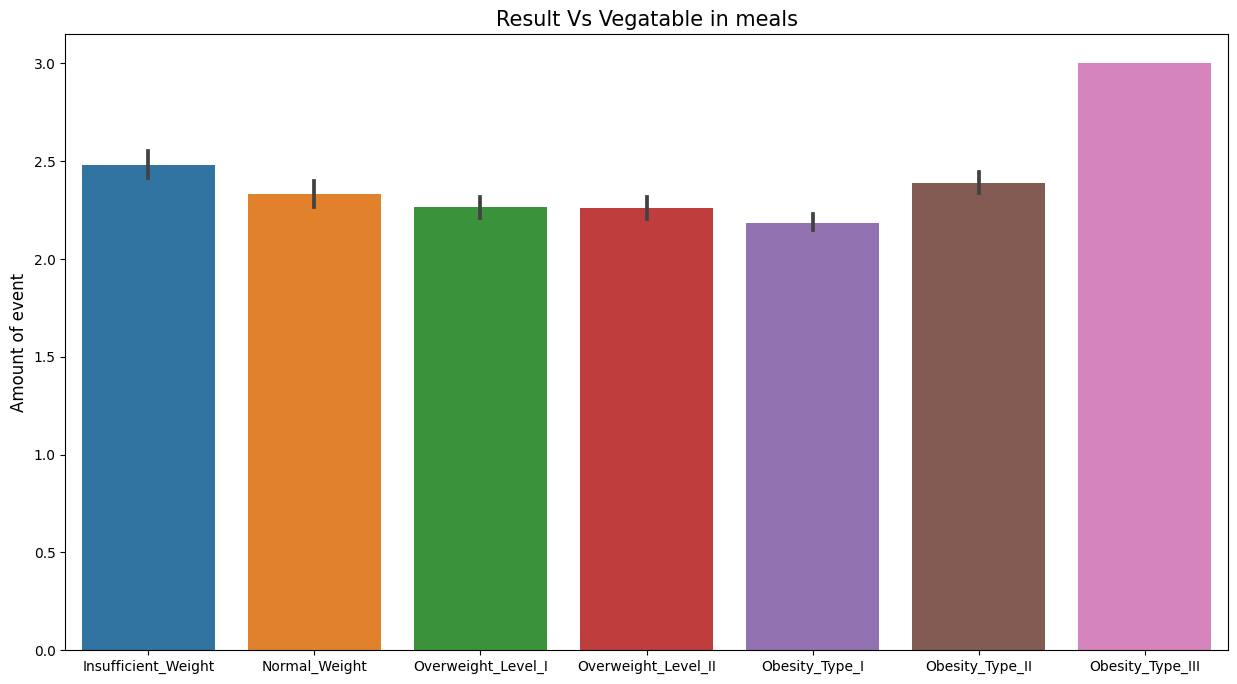

In [106]:
plt.figure(figsize=(15,8))
sns.barplot(x='NObeyesdad',y='FCVC',data=df,
            order=['Insufficient_Weight','Normal_Weight','Overweight_Level_I',
'Overweight_Level_II','Obesity_Type_I','Obesity_Type_II','Obesity_Type_III'])
plt.xlabel(None)
plt.ylabel('Amount of event',fontsize=12)
plt.title('Result Vs Vegatable in meals',fontsize=15)
plt.show()

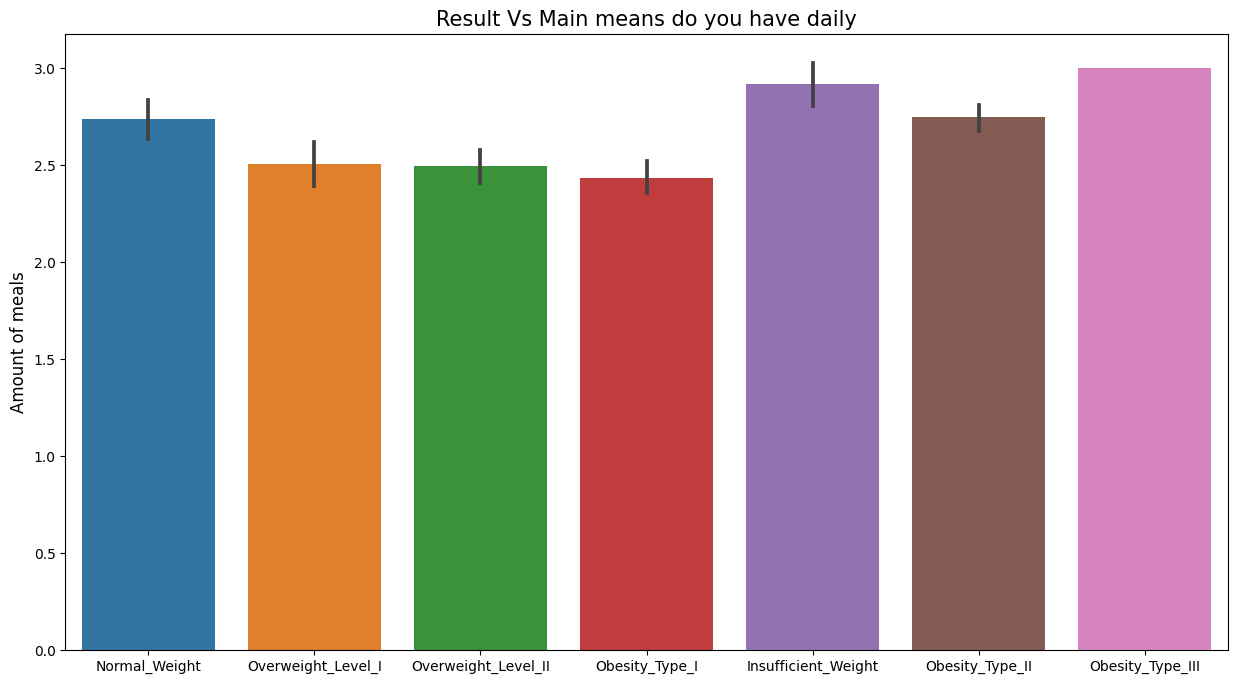

In [107]:
plt.figure(figsize=(15,8))
sns.barplot(x='NObeyesdad',y='NCP',data=df,hue_order=['Insufficient_Weight','Normal_Weight','Overweight_Level_I',
'Overweight_Level_II','Obesity_Type_I','Obesity_Type_II','Obesity_Type_III'])
plt.xlabel(None)
plt.ylabel('Amount of meals',fontsize=12)
plt.title('Result Vs Main means do you have daily',fontsize=15)
plt.show()

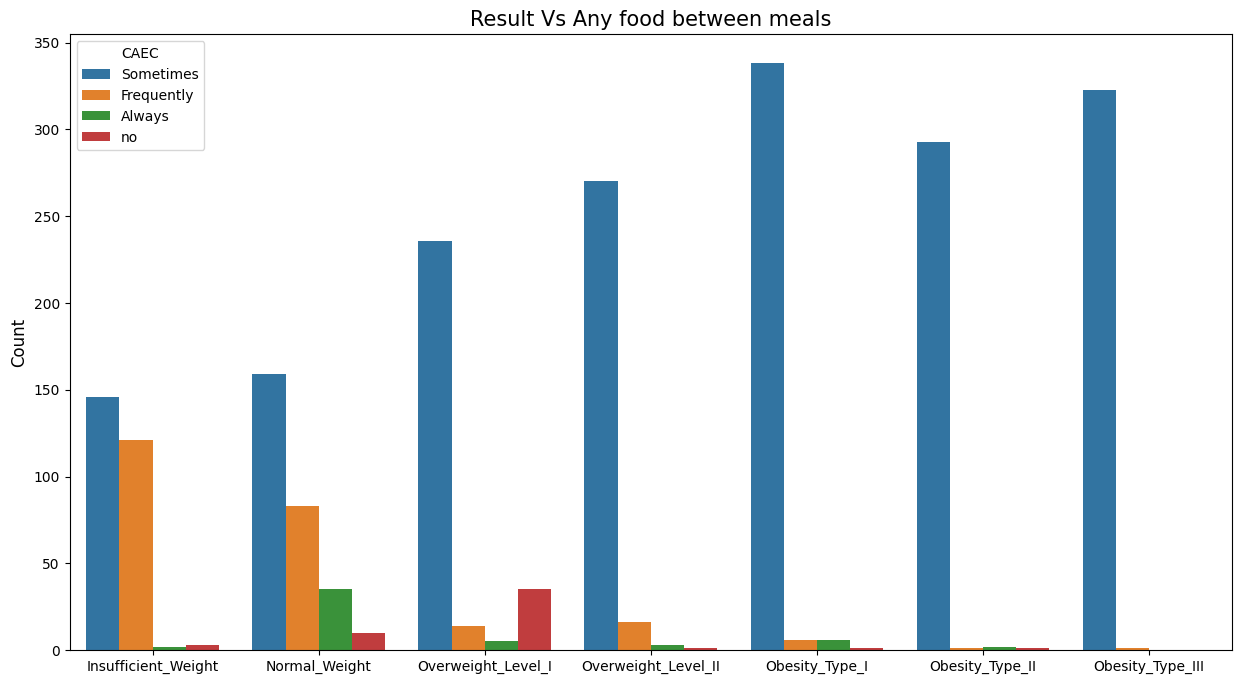

In [108]:
plt.figure(figsize=(15,8))
sns.countplot(x='NObeyesdad',data=df,hue='CAEC',
            order=['Insufficient_Weight','Normal_Weight','Overweight_Level_I',
'Overweight_Level_II','Obesity_Type_I','Obesity_Type_II','Obesity_Type_III'])
plt.xlabel(None)
plt.ylabel('Count',fontsize=12)
plt.title('Result Vs Any food between meals',fontsize=15)
plt.show()

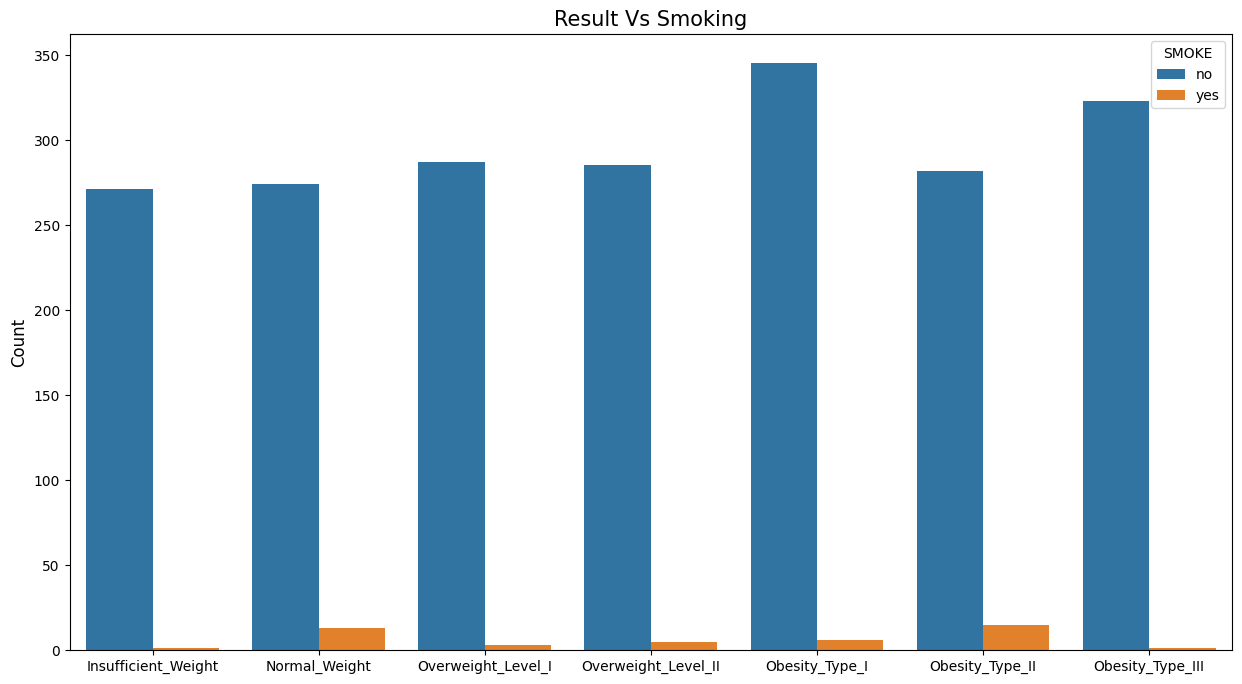

In [109]:
plt.figure(figsize=(15,8))
sns.countplot(x='NObeyesdad',data=df,hue='SMOKE',
            order=['Insufficient_Weight','Normal_Weight','Overweight_Level_I',
'Overweight_Level_II','Obesity_Type_I','Obesity_Type_II','Obesity_Type_III'])
plt.xlabel(None)
plt.ylabel('Count',fontsize=12)
plt.title('Result Vs Smoking',fontsize=15)
plt.show()

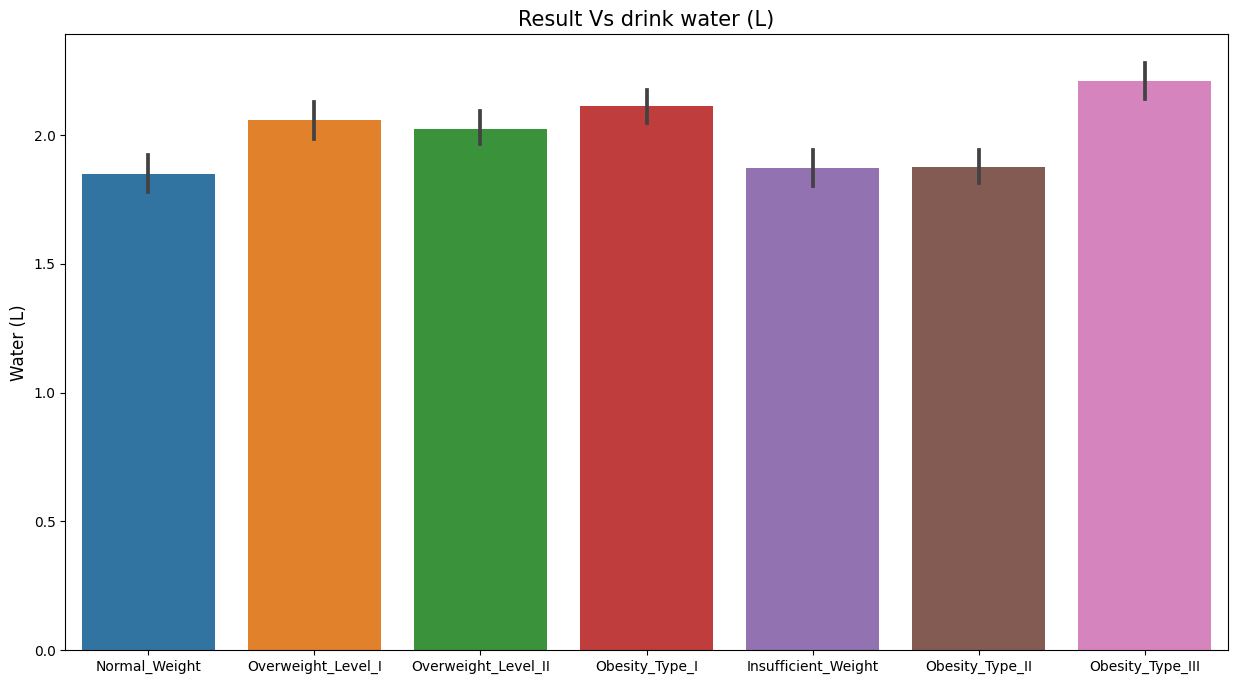

In [110]:
plt.figure(figsize=(15,8))
sns.barplot(x='NObeyesdad',y='CH2O',data=df,hue_order=['Insufficient_Weight','Normal_Weight','Overweight_Level_I',
'Overweight_Level_II','Obesity_Type_I','Obesity_Type_II','Obesity_Type_III'])
plt.xlabel(None)
plt.ylabel('Water (L)',fontsize=12)
plt.title('Result Vs drink water (L)',fontsize=15)
plt.show()

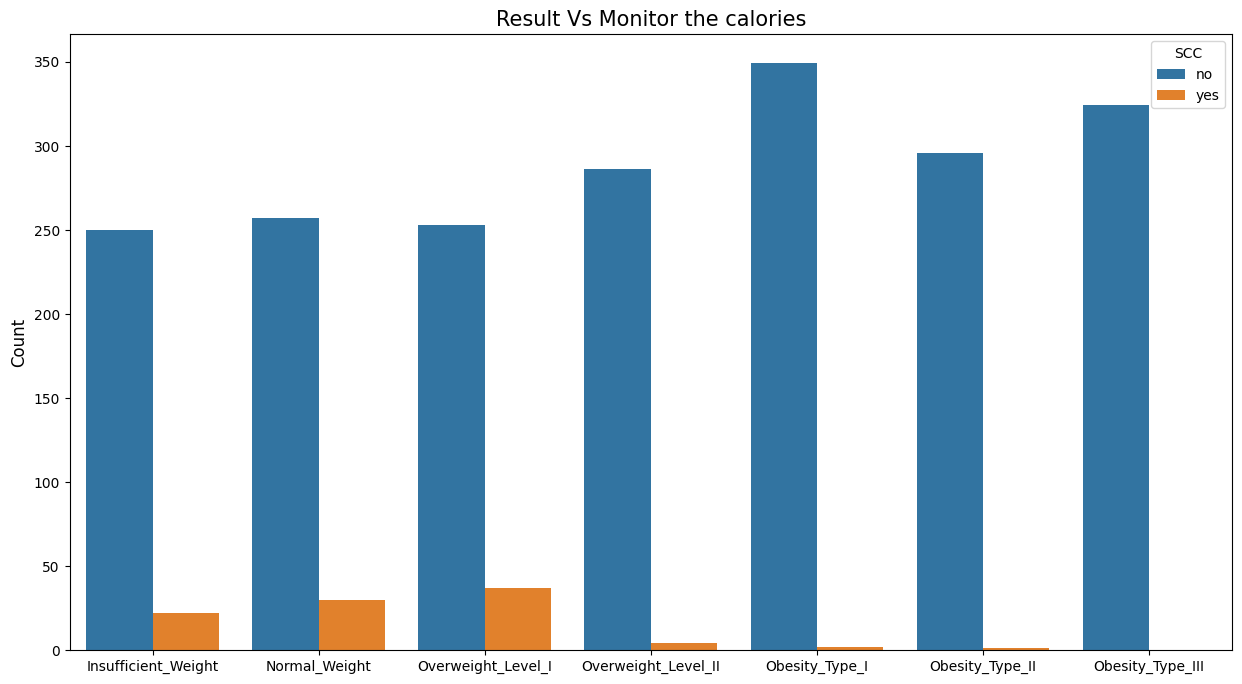

In [111]:
plt.figure(figsize=(15,8))
sns.countplot(x='NObeyesdad',data=df,hue='SCC',
            order=['Insufficient_Weight','Normal_Weight','Overweight_Level_I',
'Overweight_Level_II','Obesity_Type_I','Obesity_Type_II','Obesity_Type_III'])
plt.xlabel(None)
plt.ylabel('Count',fontsize=12)
plt.title('Result Vs Monitor the calories',fontsize=15)
plt.show()

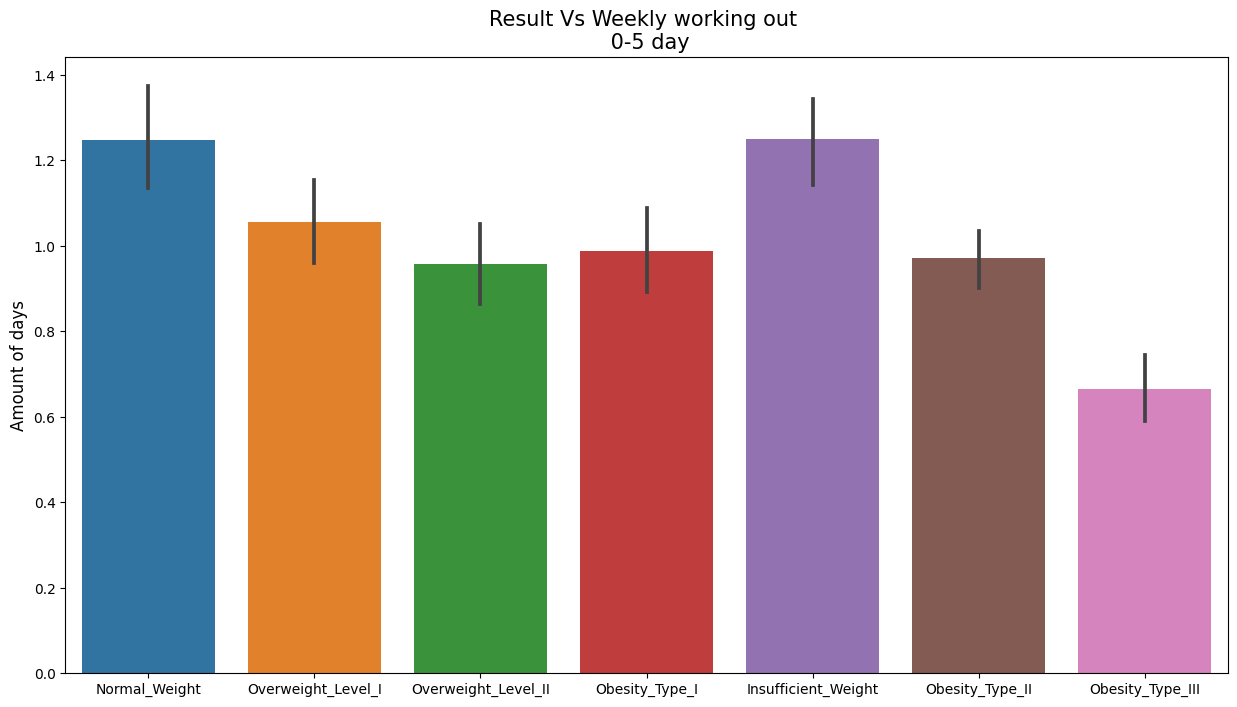

In [112]:
plt.figure(figsize=(15,8))
sns.barplot(x='NObeyesdad',y='FAF',data=df,hue_order=['Insufficient_Weight','Normal_Weight','Overweight_Level_I',
'Overweight_Level_II','Obesity_Type_I','Obesity_Type_II','Obesity_Type_III'])
plt.ylabel('Amount of days',fontsize=12)
plt.xlabel(None)
plt.title('Result Vs Weekly working out \n 0-5 day',fontsize=15)
plt.show()

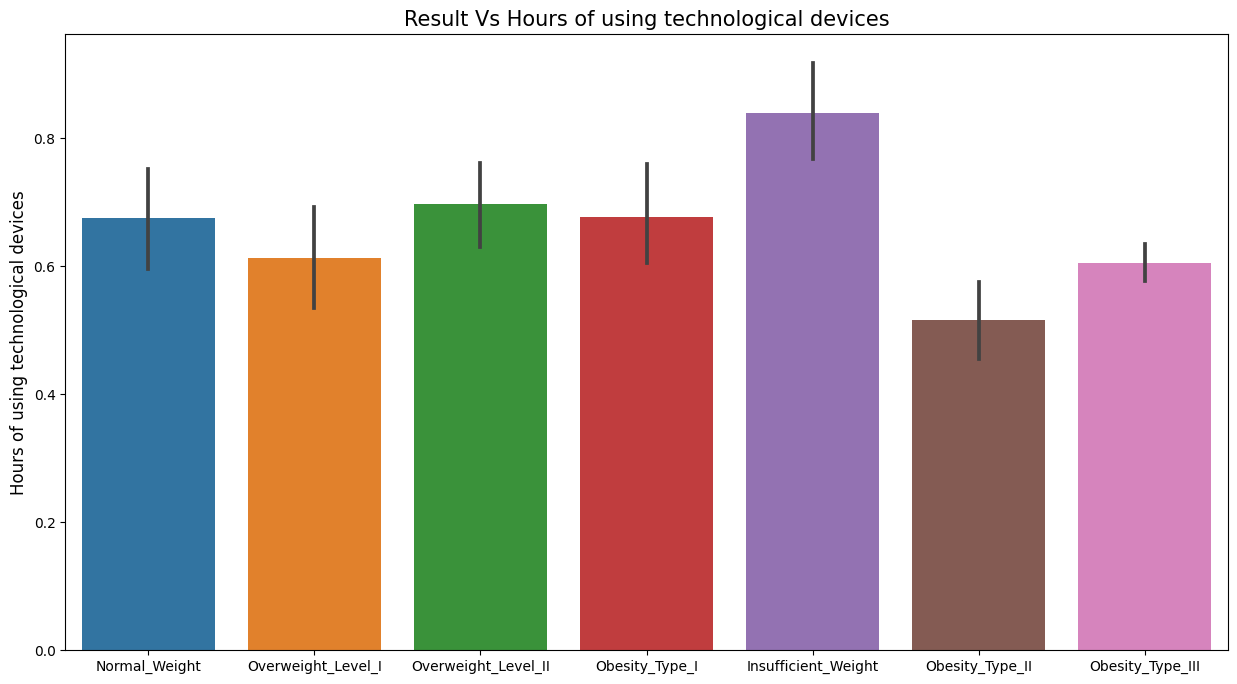

In [113]:
plt.figure(figsize=(15,8))
sns.barplot(x='NObeyesdad',y='TUE',data=df,hue_order=['Insufficient_Weight','Normal_Weight','Overweight_Level_I',
'Overweight_Level_II','Obesity_Type_I','Obesity_Type_II','Obesity_Type_III'])
plt.xlabel(None)
plt.ylabel('Hours of using technological devices',fontsize=12)
plt.title('Result Vs Hours of using technological devices',fontsize=15)
plt.show()

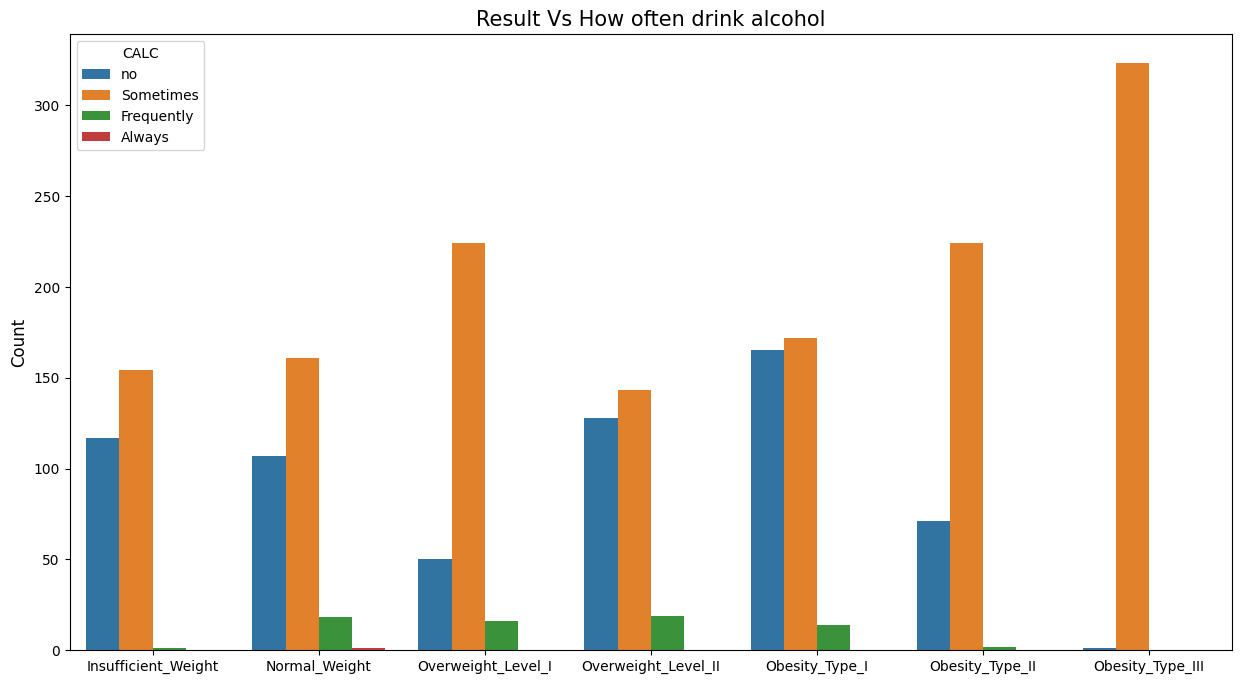

In [114]:
plt.figure(figsize=(15,8))
sns.countplot(x='NObeyesdad',data=df,hue='CALC',
            order=['Insufficient_Weight','Normal_Weight','Overweight_Level_I',
'Overweight_Level_II','Obesity_Type_I','Obesity_Type_II','Obesity_Type_III'])
plt.xlabel(None)
plt.ylabel('Count',fontsize=12)
plt.title('Result Vs How often drink alcohol',fontsize=15)
plt.show()

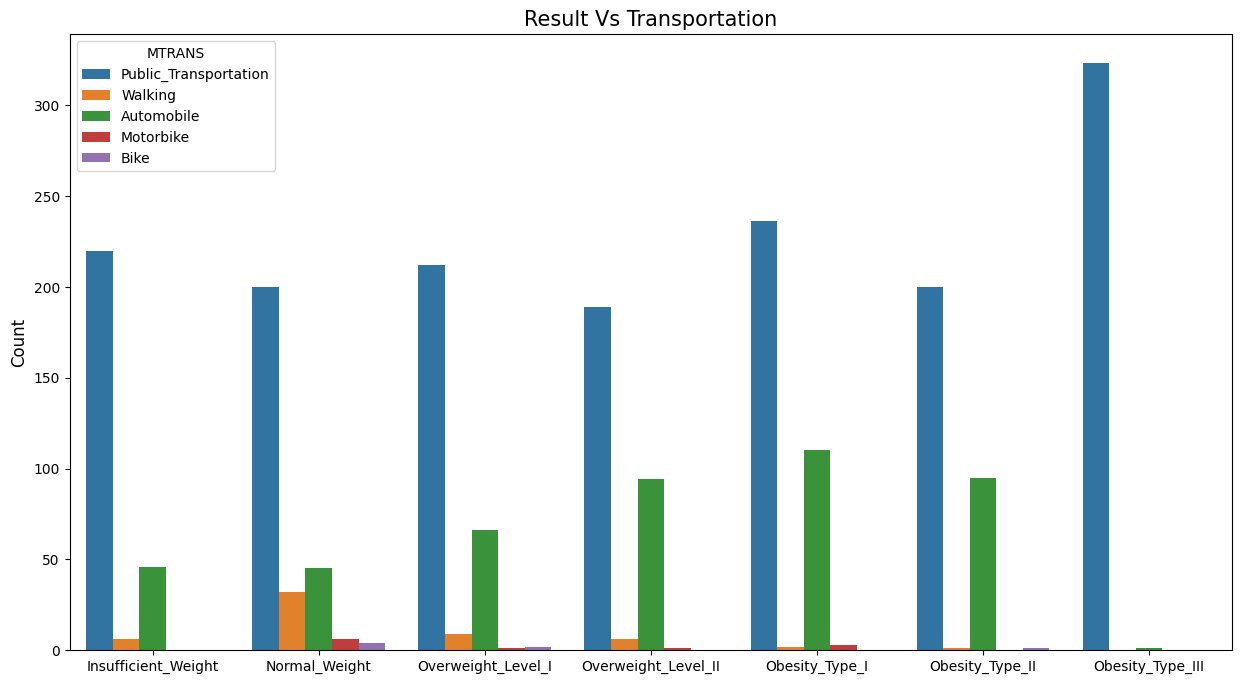

In [115]:
plt.figure(figsize=(15,8))
sns.countplot(x='NObeyesdad',data=df,hue='MTRANS',
            order=['Insufficient_Weight','Normal_Weight','Overweight_Level_I',
'Overweight_Level_II','Obesity_Type_I','Obesity_Type_II','Obesity_Type_III'])
plt.xlabel(None)
plt.ylabel('Count',fontsize=12)
plt.title('Result Vs Transportation',fontsize=15)
plt.show()

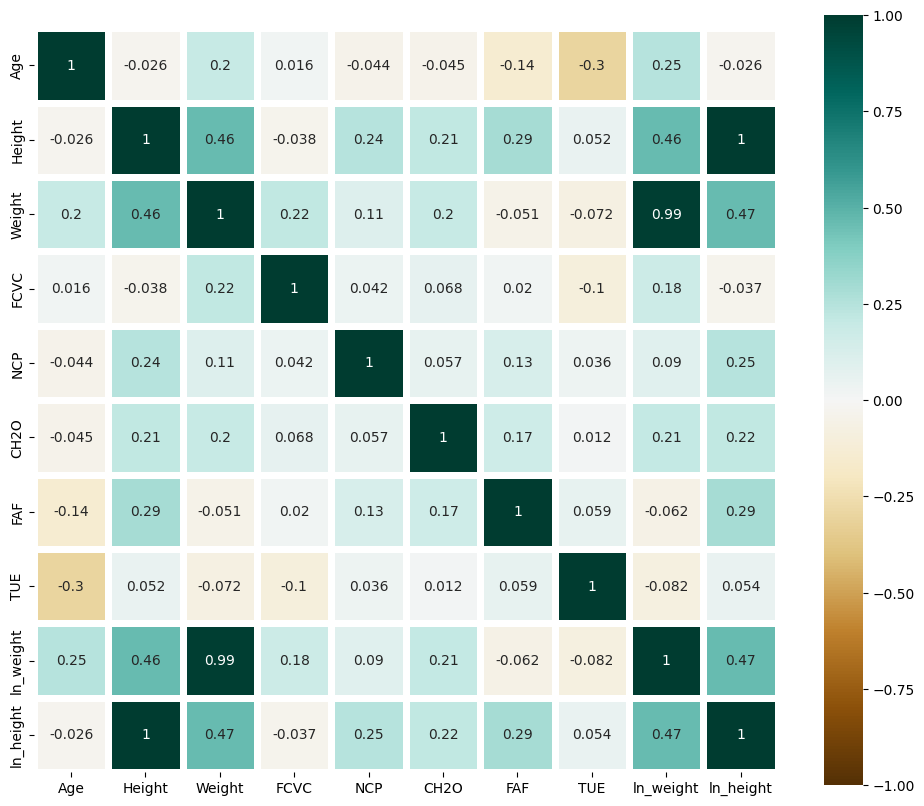

In [116]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(),annot=True,square=True,center=0,vmin=-1,vmax=1,
            cmap='BrBG',linewidths=5);

In [117]:
# Encode categorical variables
label_encoders = {}
categorical_cols = ["Gender", "family_history_with_overweight", "FAVC", "CAEC", "SMOKE", "SCC", "CALC", "MTRANS"]
for col in categorical_cols:
    label_encoders[col] = LabelEncoder()
    df[col] = label_encoders[col].fit_transform(df[col])

In [118]:
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,ln_weight,ln_height
0,0,21.0,1.62,64.0,1,0,2.0,3.0,2,0,2.0,0,0.0,1.0,3,3,Normal_Weight,4.158883,0.482426
1,0,21.0,1.52,56.0,1,0,3.0,3.0,2,1,3.0,1,3.0,0.0,2,3,Normal_Weight,4.025352,0.418710
2,1,23.0,1.80,77.0,1,0,2.0,3.0,2,0,2.0,0,2.0,1.0,1,3,Normal_Weight,4.343805,0.587787
3,1,27.0,1.80,87.0,0,0,3.0,3.0,2,0,2.0,0,2.0,0.0,1,4,Overweight_Level_I,4.465908,0.587787
4,1,22.0,1.78,89.8,0,0,2.0,1.0,2,0,2.0,0,0.0,0.0,2,3,Overweight_Level_II,4.497585,0.576613


In [119]:
df["Gender"].value_counts()

1    1068
0    1043
Name: Gender, dtype: int64

In [120]:
df["CALC"].value_counts()

2    1401
3     639
1      70
0       1
Name: CALC, dtype: int64

In [121]:
# Split dataset
X = df.drop(columns=["NObeyesdad"])
y = df["NObeyesdad"]
X_train, X_holdout, y_train, y_holdout = train_test_split(X, y, test_size=0.2)

In [122]:
# Scaling the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_holdout_scaled = scaler.transform(X_holdout)

## Logistic Regression

In [123]:
from sklearn.linear_model import LogisticRegression
reg = LogisticRegression()
reg.fit(X_train,y_train)
regpred = reg.predict(X_holdout)

from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
print(classification_report(y_holdout,regpred))
print("Accuracy of Logistic Regression is : ",accuracy_score(y_holdout,regpred)*100)

                     precision    recall  f1-score   support

Insufficient_Weight       0.80      0.93      0.86        56
      Normal_Weight       0.62      0.54      0.58        57
     Obesity_Type_I       0.60      0.65      0.62        74
    Obesity_Type_II       0.91      0.83      0.87        64
   Obesity_Type_III       0.91      0.98      0.94        60
 Overweight_Level_I       0.55      0.57      0.56        58
Overweight_Level_II       0.51      0.43      0.46        54

           accuracy                           0.71       423
          macro avg       0.70      0.70      0.70       423
       weighted avg       0.70      0.71      0.70       423

Accuracy of Logistic Regression is :  70.6855791962175


## KNN

In [124]:
# 3. KNN
knn_model = KNeighborsClassifier()
knn_model.fit(X_train_scaled, y_train)
knn_pred = knn_model.predict(X_holdout_scaled)

In [125]:
# Confusion Matrix
confusion_matrix_knn = confusion_matrix(y_holdout, knn_pred)
accuracy_knn = accuracy_score(y_holdout, knn_pred)
precision_knn = precision_score(y_holdout, knn_pred, average='macro')
recall_knn = recall_score(y_holdout, knn_pred, average='macro')
f1_knn = f1_score(y_holdout, knn_pred, average='macro')
balanced_accuracy_knn = balanced_accuracy_score(y_holdout, knn_pred)

In [126]:
print(confusion_matrix_knn)

[[53  3  0  0  0  0  0]
 [ 7 31  5  1  0  9  4]
 [ 0  1 69  2  1  0  1]
 [ 0  0  0 63  0  0  1]
 [ 0  0  0  0 59  1  0]
 [ 1  1  2  2  0 47  5]
 [ 1  1  7  1  0  3 41]]


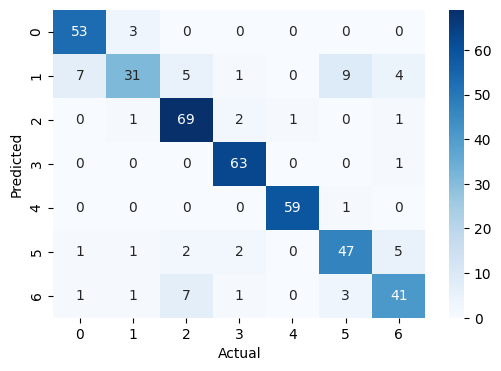

In [127]:
# Plot Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix_knn, annot=True, cmap="Blues")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

## Random Forest

In [128]:
# 4. Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(X_train_scaled, y_train)
rf_pred = rf_model.predict(X_holdout_scaled)

In [129]:
# Confusion Matrix
confusion_matrix_rf = confusion_matrix(y_holdout, rf_pred)
accuracy_rf = accuracy_score(y_holdout, rf_pred)
precision_rf = precision_score(y_holdout, rf_pred, average='macro')
recall_rf = recall_score(y_holdout, rf_pred, average='macro')
f1_rf = f1_score(y_holdout, rf_pred, average='macro')
balanced_accuracy_rf = balanced_accuracy_score(y_holdout, rf_pred)

In [130]:
print(confusion_matrix_rf)

[[54  2  0  0  0  0  0]
 [ 0 56  0  0  0  1  0]
 [ 0  0 72  1  0  0  1]
 [ 0  0  0 64  0  0  0]
 [ 0  0  0  0 60  0  0]
 [ 0  1  0  0  0 55  2]
 [ 0  1  2  0  0  0 51]]


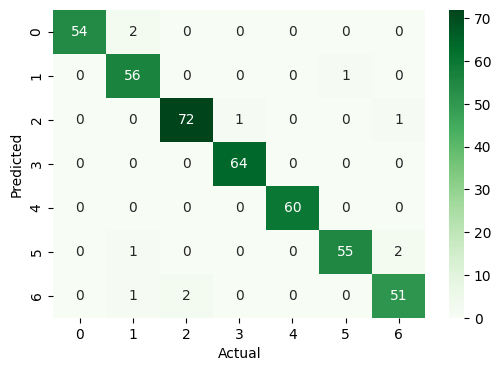

In [131]:
# Plot Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix_rf, annot=True, cmap="Greens")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

## Decision Tree

In [132]:
dtree = tree.DecisionTreeClassifier()
dtree.fit(X_train,y_train)
dtreepred = dtree.predict(X_holdout)

confusion_matrix_dt = confusion_matrix(y_holdout, dtreepred)
accuracy_dt = accuracy_score(y_holdout, dtreepred)
precision_dt = precision_score(y_holdout, dtreepred, average='macro')
recall_dt = recall_score(y_holdout, dtreepred, average='macro')
f1_dt = f1_score(y_holdout, dtreepred, average='macro')
balanced_accuracy_dt = balanced_accuracy_score(y_holdout, dtreepred)

In [133]:
print(confusion_matrix_dt)

[[51  5  0  0  0  0  0]
 [ 4 48  0  0  0  5  0]
 [ 0  0 70  3  0  0  1]
 [ 0  0  2 62  0  0  0]
 [ 0  0  0  0 60  0  0]
 [ 0  2  0  0  0 55  1]
 [ 0  0  2  0  0  3 49]]


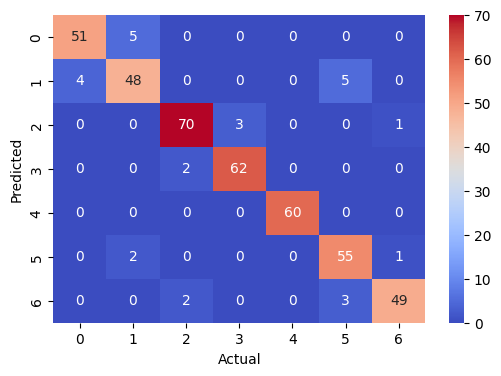

In [134]:
# Plot Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix_dt, annot=True, cmap="coolwarm")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

## Model comparison

In [76]:
# Model Comparison
models = ['KNN', 'Random Forest', 'Decision Tree']
accuracies = [accuracy_knn, accuracy_rf, accuracy_dt]
precisions = [precision_knn, precision_rf, precision_dt]
recalls = [recall_knn, recall_rf, recall_dt]
f1_scores = [f1_knn, f1_rf, f1_dt]
balanced_accuracies = [balanced_accuracy_knn, balanced_accuracy_rf, balanced_accuracy_dt]

In [77]:
model_comparison = pd.DataFrame({'Model': models, 'Accuracy': accuracies, 'Precision': precisions,
                                 'Recall': recalls, 'F1 Score': f1_scores, 
                                 'Balanced Accuracy': balanced_accuracies})

In [78]:
print(model_comparison)

           Model  Accuracy  Precision    Recall  F1 Score  Balanced Accuracy
0            KNN  0.853428   0.845142  0.854290  0.838082           0.854290
1  Random Forest  0.966903   0.965416  0.966219  0.965578           0.966219
2  Decision Tree  0.917258   0.914465  0.914027  0.913352           0.914027


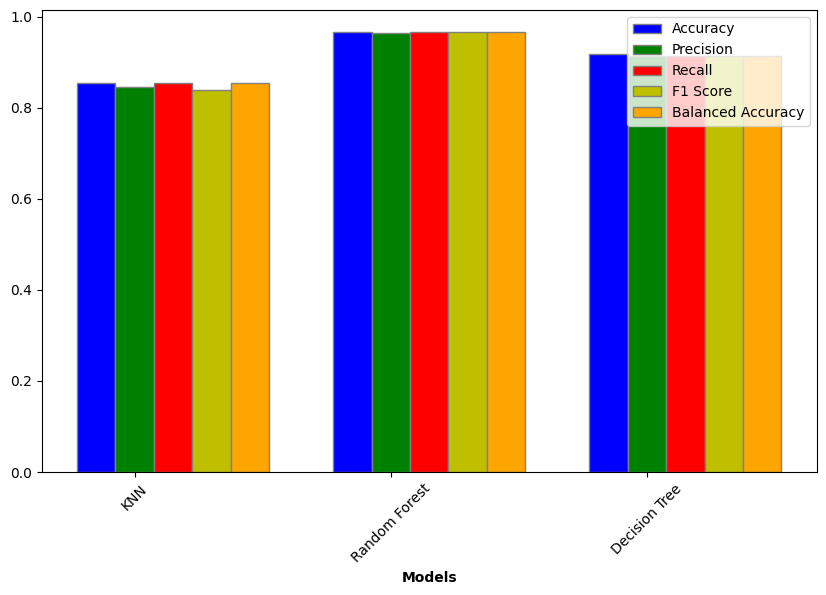

In [79]:
# Plotting
plt.figure(figsize=(10, 6))
barWidth = 0.15
r1 = np.arange(len(models))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
r5 = [x + barWidth for x in r4]

plt.bar(r1, accuracies, color='b', width=barWidth, edgecolor='grey', label='Accuracy')
plt.bar(r2, precisions, color='g', width=barWidth, edgecolor='grey', label='Precision')
plt.bar(r3, recalls, color='r', width=barWidth, edgecolor='grey', label='Recall')
plt.bar(r4, f1_scores, color='y', width=barWidth, edgecolor='grey', label='F1 Score')
plt.bar(r5, balanced_accuracies, color='orange', width=barWidth, edgecolor='grey', label='Balanced Accuracy')

z = range(1, len(uniq))
cmap = plt.get_cmap('hsv')
cNorm = colors.Normalize(vmin=0, vmax=len(uniq))
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=cmap)

plt.xlabel('Models', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(models))], models, rotation=45)
plt.legend()
plt.show()